In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [86]:
#df1=pd.read_csv(r'C:\Users\kacpr\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv',delimiter=';')
df1=pd.read_csv(r'/content/otomoto_offers_eng_23-04-2023.csv',delimiter=';')

<ipython-input-86-8439656ded30>:2: DtypeWarning: Columns (200) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r'/content/otomoto_offers_eng_23-04-2023.csv',delimiter=';')


# Transformacje

## Wybór zmiennych

In [87]:
df1.shape

(208205, 224)

In [88]:
df1.shape
df2=df1.copy()
df3= df2.copy()

Te kolumny usuwam, ponieważ są zbędne do naszego modelu: 'id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'

wyrzucam offer_creation_year bo wszystkie dane są z tego samego miesiaca i offer_from bo to to samo co seller type tylko po polsku. Category to po prostu osobowe, wiec tą kolumne tez usuwam. Id bo bez sensu

<ipython-input-89-ac1f9015eab7>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.fillna(False)
<ipython-input-89-ac1f9015eab7>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.replace('Tak',True)


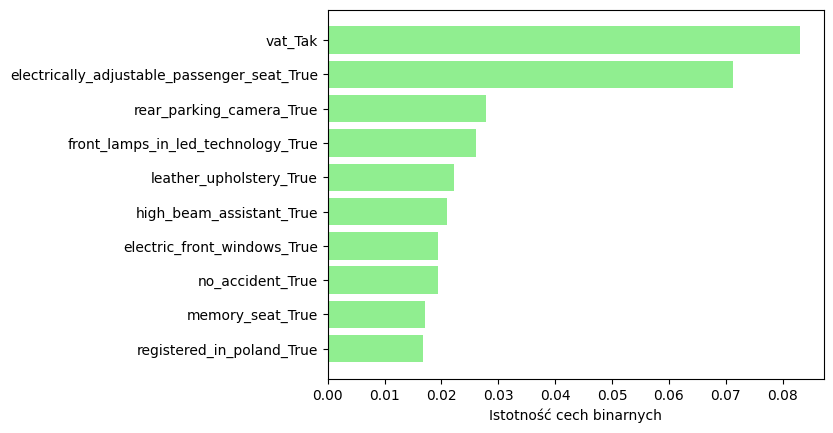

In [89]:
df4=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()
df3=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()

#Wybór kolumn od 17-end, czyli wszystkich binarnych
X=df3.iloc[:,17:]
df3=df3.drop(df3.iloc[:,17:],axis=1).copy()
X=X.fillna(False)
X=X.replace('Tak',True)
y=df3['price']

# Usuwanie kolumn, gdzie mniej niż 1% różnorodności (binarne)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)
columns_to_remove = X.columns[~selector.get_support()]
X = selector.transform(X)

# Usuwanie kolumn, gdzie mniej niż 1% różnorodności (binarne)
df32 = df4.drop(columns=columns_to_remove, axis=1)
X=df32.iloc[:,17:]
X=X.fillna(0)
X = pd.get_dummies(X, drop_first=True)

# feature selection
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor()
model.fit(X, y)

xgb_importance = model.feature_importances_

sorted_idx = np.argsort(xgb_importance)[-10:]
plt.barh(X.columns[sorted_idx], xgb_importance[sorted_idx], color='lightgreen')
plt.xlabel("Istotność cech binarnych")

top_5_features = X.columns[sorted_idx][-5:]
plt.show()

## lista wybranych kolumn

In [90]:
variables_to_add = ['leather_upholstery', 'front_lamps_in_led_technology', 'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat','no_accident','damaged']
df3 = pd.concat([df3, df2[variables_to_add]], axis=1)
df3['vat']=df3['vat'].fillna('Nie')
df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
df3['front_lamps_in_led_technology']=df3['front_lamps_in_led_technology'].fillna(False)
df3['rear_parking_camera']=df3['rear_parking_camera'].fillna(False)
df3['no_accident']=df3['no_accident'].fillna(False)
df3['damaged']=df3['damaged'].fillna(False)

<ipython-input-90-ecb1269fc0ca>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
<ipython-input-90-ecb1269fc0ca>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
<ipython-input-90-ecb1269fc0ca>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the fu

### Powiązanie zmiennych binarnych z wiekiem samochodu

In [91]:
pivot_table = pd.pivot_table(df3, values='production_year', index='state', columns='rear_parking_camera', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df3, values='production_year', index='state', columns='vat', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df3, values='production_year', index='state', columns='leather_upholstery', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df3, values='production_year', index='state', columns='front_lamps_in_led_technology', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df3, values='production_year', index='state', columns='electrically_adjustable_passenger_seat', aggfunc='mean')
print(pivot_table)

rear_parking_camera        False        True 
state                                        
New                  2022.609133  2022.582222
Used                 2011.256460  2017.135457
vat            Nie          Tak
state                          
New    2022.581221  2022.595772
Used   2011.473561  2017.898356
leather_upholstery        False        True 
state                                       
New                 2022.610680  2022.525416
Used                2012.578212  2013.815586
front_lamps_in_led_technology        False        True 
state                                                  
New                            2022.593495  2022.593122
Used                           2011.626410  2018.395032
electrically_adjustable_passenger_seat        False        True 
state                                                           
New                                     2022.607693  2022.541182
Used                                    2012.483098  2014.343171


## Czyszczenie i edycja danych

In [92]:
#przewalutowanie na PLN
df3['price'] = df3['price'].astype(float)
df3.loc[df3['currency'] == 'EUR', 'price'] *= 4.29
df3=df3.drop('currency',axis=1)

#Usuniecie samochodów z uszkodzeniami
filt=(df3['no_accident']==True)
df3=df3.loc[filt]
filt=(df3['damaged']=='Tak')
df3=df3.loc[~filt]
len(df3)

#usuniecie miar
df3['mileage'] = df3['mileage'].str.replace(' km','').str.replace(' ','').astype(float)
df3['engine_displacement'] = df3['engine_displacement'].str.replace(' cm3','').str.replace(' ','').astype(float)
df3['power'] = df3['power'].str.replace(' KM','').str.replace(' ','').astype(float)

#kolumna car age
df3['car_age'] = df3['production_year'].apply(lambda x: 2023 - x)
df3=df3.drop('production_year',axis=1)

#kolumna seller experience
df3['seller_experience'] = df3['seller_registration_year'].apply(lambda x: 2023 - x)
df3=df3.drop('seller_registration_year',axis=1)
#kolumna seller experience czyszczenie bledow - serwis OtoMoto powstał w 2004 roku(czyli 19 lat od 2023), a w danych znajduje sie 30 wartości które mają więcej niż 19 lat. Zamienie te wartości na średnią
filt=df3['seller_experience']>19
df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()

<ipython-input-92-dbe26a6f72d2>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.24230544880593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()


## Podsumowanie czyszczenia i transformacji danych


2. Pozbyłem się potem kolejnych kolumn, które wydawały się zbędnę np. kolor, lokalizacja
3. Zmieniłem wszystkie ceny na jedną walutę
5. Usunąłem pojazdy oznaczone jako 'damaged' albo 'accident'
6. Wyczyściłem zmienne liczbowe z miar
7. Stworzyłem kolumnę 'car_age'
8. Stworzyłem kolumnę seller_experience

### Sprawdzenie wartości brakujących i odstających

In [93]:
df4=df3.copy()
df4.isnull().values.any()

np.True_

#### Engine_displacement

In [94]:
df4['engine_displacement'].isnull().sum()
filt=(df4['fuel_type']=='Electric') | (df4['fuel_type']=='Hyrdrogen')
df4.loc[filt]

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,fuel_consumption_in_city,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
370,307100.0,Authorized Dealer,Skoda,Enyaq,10.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Nie,True,False,0,4.0
614,662900.0,Authorized Dealer,Mercedes-Benz,EQS,5.0,NaN,Electric,360.0,Automatic,SUV,...,NaN,True,False,True,True,Tak,True,False,1,13.0
744,46900.0,Dealer,Renault,Zoe,97000.0,NaN,Electric,88.0,Automatic,Compact,...,NaN,False,False,False,False,Nie,True,False,9,4.0
808,230000.0,Authorized Dealer,Skoda,Enyaq,18906.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Tak,True,False,2,6.0
879,389900.0,Authorized Dealer,Jaguar,I-Pace,17950.0,NaN,Electric,400.0,NaN,SUV,...,NaN,False,True,False,True,Tak,True,False,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207889,264900.0,Dealer,Volkswagen,Inny,1.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,False,True,False,Tak,True,False,1,3.0
208076,84900.0,Authorized Dealer,Renault,Zoe,36809.0,NaN,Electric,109.0,Automatic,Compact,...,NaN,False,False,True,False,Tak,True,False,5,5.0
208098,390000.0,Authorized Dealer,Mercedes-Benz,EQC,8000.0,NaN,Electric,408.0,Automatic,SUV,...,NaN,False,True,True,True,Tak,True,False,1,15.0
208181,249000.0,Private person,Tesla,Model S,171800.0,NaN,Electric,700.0,Automatic,Sedan,...,NaN,False,False,False,False,Tak,True,False,8,9.0


2636 z 2728 brakujących danych to samochody elektryczne które nie posiadają pojemności silnika, więc zamieniam wartości na 0

In [95]:
df4.loc[filt,'engine_displacement']=0
#resztę samochodów które miały braki uzupełniam średnią z kolumny engine displacement
df4['engine_displacement'].isnull().sum()
df4['engine_displacement'] = df4['engine_displacement'].fillna(df4['engine_displacement'].mean())

#### Number of doors

In [96]:
df4['number_of_doors'].isnull().sum()
#liczba drzwi zostawiam i z racji ze liczba brakow jest mala to usuwam wiersze z brakami
filt = df4['number_of_doors'].isnull()
df4 = df4.loc[~filt]

#### Number of seats

In [97]:
df4['number_of_seats'].isnull().sum()
#jest sporo braków więc tą kolumnę usuwam
df4=df4.drop('number_of_seats',axis=1)

#### Fuel consumption

In [98]:
df4['fuel_consumption_in_city'].isnull().sum()
#niestety tutaj też musze usunąc kolumnę bo ponad połowa to braki
df4=df4.drop('fuel_consumption_in_city',axis=1)

#### Mileage

In [99]:
(df4['mileage'].isnull()).value_counts()

,count
mileage,
False,114707
True,1200


In [100]:
df4.loc[(df4['mileage'].isnull())]['state'].value_counts()

,count
state,
New,1200


In [101]:
df4.loc[df4['mileage'].isnull(), 'mileage'] = 0
new_data = df4.dropna(axis=0, how='any')
#**W zestawie danych mamy 1200 braków w kolumnie przebieg, ale występują one tylko w przypadku aut nowych. Zakładam że mają zerowy**

#### Reszta braków

In [102]:
((len(df4)-len(new_data))/len(df4))*100
#Około 0.11 % danych miało jakieś wartości brakujące. Z uwagi na fakt, że jest to bardzo mała liczba to usuwam reszte całych wierszy z danych
df4=new_data.copy()

### Wartosci odstające

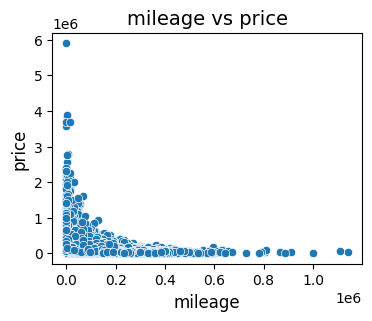

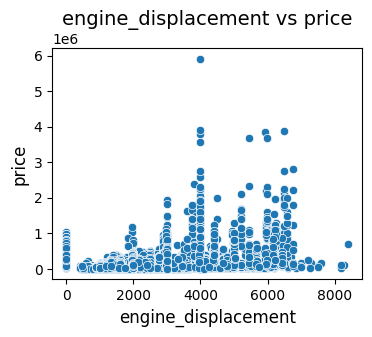

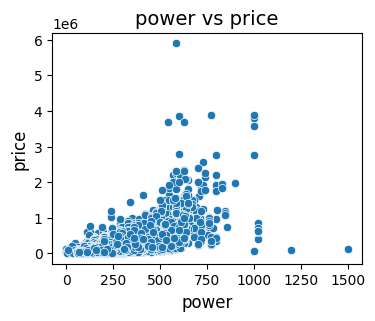

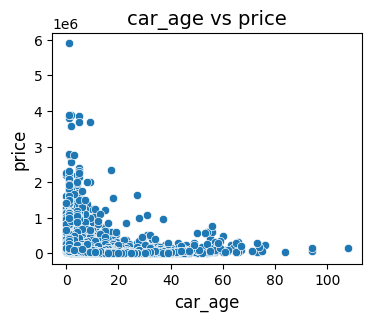

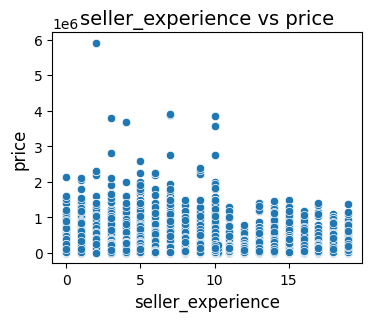

In [103]:
quantitative_vars = ['price', 'mileage', 'engine_displacement', 'power', 'car_age', 'seller_experience']
for var in quantitative_vars[1:]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df4[var], y=df4['price'])
    plt.title(f'{var} vs price', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


In [104]:
filt=df4['price']>1500000
df4=df4.loc[~filt]

Pozbywam się aut powyżej 1500000 zł

In [105]:
filt=df4['power']>800
df4.loc[filt].count()

,0
price,20
seller_type,20
vehicle_brand,20
vehicle_model,20
mileage,20
engine_displacement,20
fuel_type,20
power,20
transmission,20
body_type,20


In [106]:
filt=df4['power']>800
df4=df4.loc[~filt]

Usuwam samochody >800 koni

In [107]:
filt=df4['mileage']>1500000
df4=df4.loc[~filt]

Usuwam auta >1500000 km przebiegu

### Wybranie modeli, które mają co najmniej 100 obserwacji

In [108]:
len(df4)

115692

In [109]:
list=df4['vehicle_model'].value_counts()

In [110]:
filtered_models = list[list >= 100].index
df5 = df4[df4['vehicle_model'].isin(filtered_models)]

In [111]:
list[list >= 100].head(10)

,count
vehicle_model,
Octavia,2499
Astra,2466
A4,2155
Seria 3,2064
Seria 5,1980
Golf,1976
Focus,1906
Passat,1840
A6,1779


In [112]:
list[list >= 100].tail(20)

,count
vehicle_model,
Eclipse Cross,110
Leaf,110
Captiva,109
Elantra,109
C5X,108
EQS,108
9.mar,108
C3 Picasso,107
Jogger,106


Poniżej odkyrwam, że dwa modele Ferrari nie zostały usunięte ponieważ model o nazwie Californai również produkował Volksvagen, dlatego nie zostały usuniete te dwa przypadki

In [113]:
ferrari_data = df5[df5['vehicle_brand'] == 'Ferrari']
ferrari_data

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
53663,646000.0,Authorized Dealer,Ferrari,California,68289.0,4297.0,Gasoline,460.0,Automatic,Cabriolet,...,Used,False,False,True,True,Nie,True,False,9,10.0
83835,750000.0,Private person,Ferrari,California,14950.0,3855.0,Gasoline,560.0,Automatic,Cabriolet,...,Used,True,False,True,True,Nie,True,False,7,9.0


In [114]:
df5 = df5[df5['vehicle_brand'] != 'Ferrari']

Usuwam wszystkie modele oznaczone jako 'inny'

In [115]:
df5 = df5[df5['vehicle_model'] != 'Inny']


In [116]:
ferrari_data = df5[df5['vehicle_brand'] == 'Ferrari']
ferrari_data

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience


Zmiana na kategoryczne zmienne

In [117]:
categorical_columns = ['seller_type', 'fuel_type','vehicle_model','vehicle_brand', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
numeric_features = ['price','power', 'mileage', 'car_age','engine_displacement','seller_experience']
df5[categorical_columns] = df5[categorical_columns].astype('category')
df5.drop(columns=['damaged'], inplace=True)
df5.drop(columns=['no_accident'], inplace=True)
df5[numeric_features]=df5[numeric_features].astype(np.float32)

# EDA i korelacje

usuniecie dwoch fiatow 500 ponad 60 letnich

In [118]:
df5=df5[df5['car_age']<60]

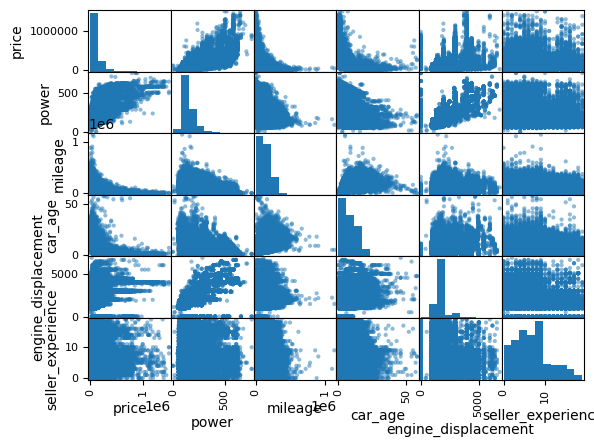

In [119]:
scatter_matrix(df5[numeric_features]) #sns.pairplot(df4[['price','mileage','engine_displacement','power','car_age','seller_experience']], diag_kind='kde')
plt.show()

## Czy cena zależy od marki auta?

<ipython-input-120-59e6f791bc4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nlargest(10).index


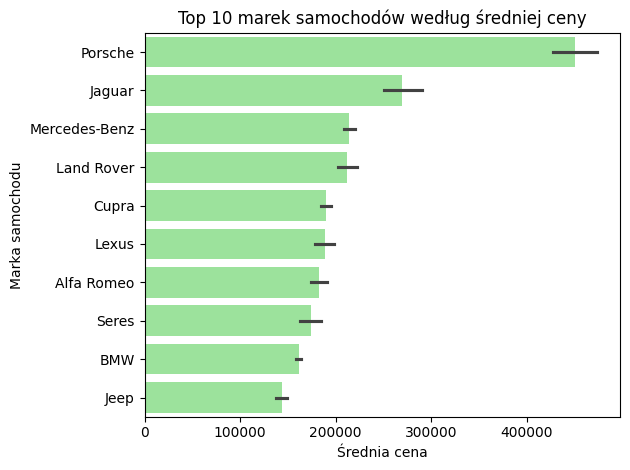

In [120]:
top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nlargest(10).index
filtered_df = df5[df5['vehicle_brand'].isin(top_10_brands)]

plt.figure()
sns.barplot(
    x=filtered_df['price'],
    y=filtered_df['vehicle_brand'],
    orient='h',
    order=top_10_brands,
    color='lightgreen'
)
plt.title('Top 10 marek samochodów według średniej ceny')
plt.xlabel('Średnia cena')
plt.ylabel('Marka samochodu')
plt.tight_layout()
plt.show()

<ipython-input-121-e0634cc82499>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nsmallest(10).index


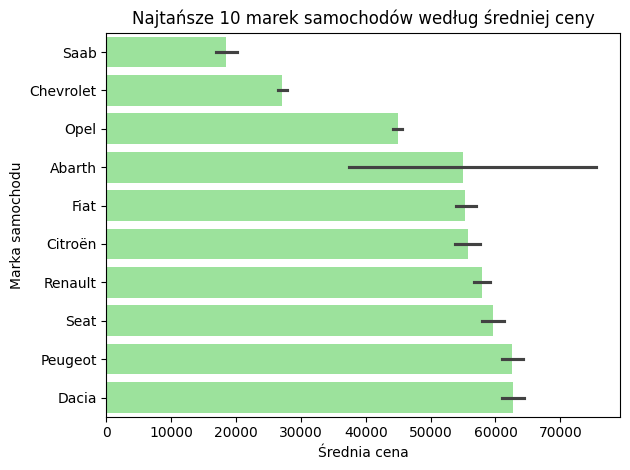

In [121]:
top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nsmallest(10).index
filtered_df = df5[df5['vehicle_brand'].isin(top_10_brands)]

plt.figure()
sns.barplot(
    x=filtered_df['price'],
    y=filtered_df['vehicle_brand'],
    orient='h',
    order=top_10_brands,
    color='lightgreen'
)
plt.title('Najtańsze 10 marek samochodów według średniej ceny')
plt.xlabel('Średnia cena')
plt.ylabel('Marka samochodu')
plt.tight_layout()
plt.show()

vehicle_brand
BMW              9599
Volkswagen       9095
Audi             8380
Opel             7633
Ford             7555
Skoda            6798
Mercedes-Benz    6303
Renault          4981
Toyota           4368
Hyundai          4009
Name: count, dtype: int64


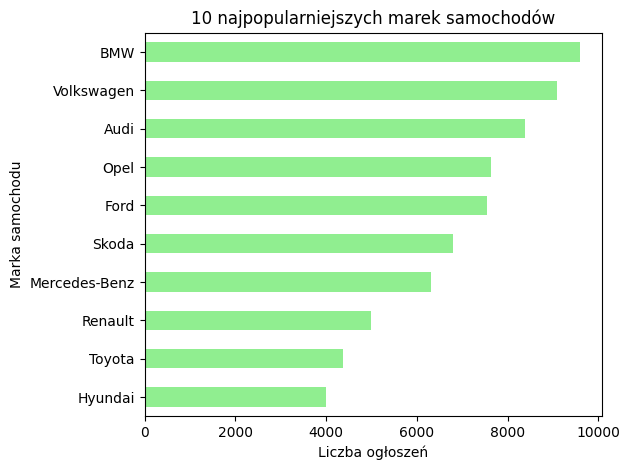

In [122]:
most_popular_brands = df5['vehicle_brand'].value_counts().nlargest(10)
print(most_popular_brands)

ax = most_popular_brands.iloc[::-1].plot(kind='barh', color='lightgreen')
ax.set_title('10 najpopularniejszych marek samochodów')
ax.set_xlabel('Liczba ogłoszeń')
ax.set_ylabel('Marka samochodu')
plt.tight_layout()
plt.show()




vehicle_model
Octavia     2499
Astra       2466
A4          2155
Seria 3     2064
Seria 5     1980
Golf        1976
Focus       1906
Passat      1840
A6          1779
Insignia    1522
Name: count, dtype: int64


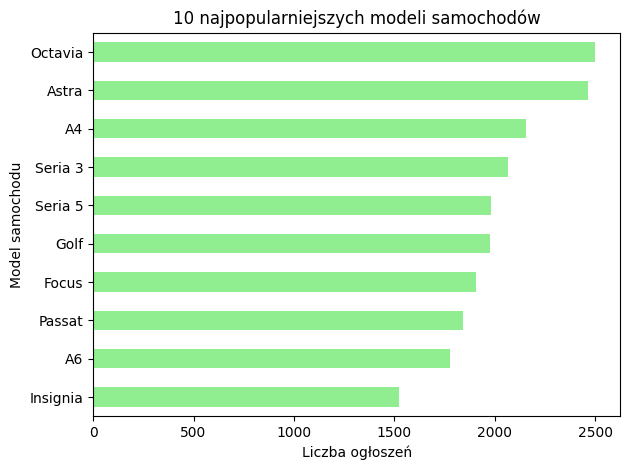

In [123]:
most_popular_brands = df5['vehicle_model'].value_counts().nlargest(10)
print(most_popular_brands)

ax = most_popular_brands.iloc[::-1].plot(kind='barh', color='lightgreen')
ax.set_title('10 najpopularniejszych modeli samochodów')
ax.set_xlabel('Liczba ogłoszeń')
ax.set_ylabel('Model samochodu')
plt.tight_layout()
plt.show()

## Typ paliwa

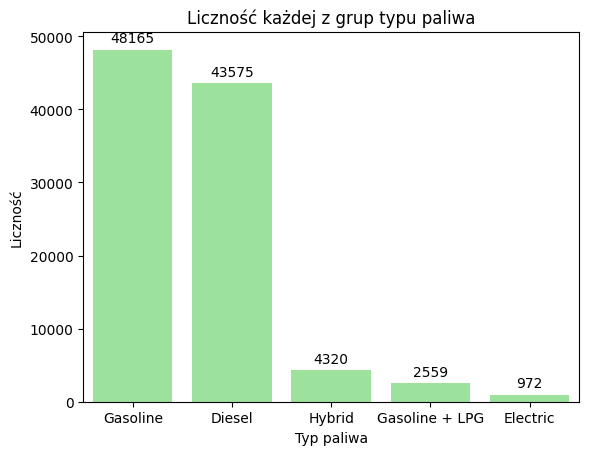

In [124]:
# usunięcie CNG
df5 = df5[df5['fuel_type'] != 'Gasoline + CNG']
df5 = df5[df5['fuel_type'].notna()]  # usuń wiersze z brakującą wartością fuel_type
df5 = df5[df5['fuel_type'] != '']    # usuń puste stringi jeśli są

# jeśli fuel_type jest typu category, usuń nieużywane kategorie
if hasattr(df5['fuel_type'], 'cat'):
    df5['fuel_type'] = df5['fuel_type'].cat.remove_unused_categories()

plt.figure()
ax = sns.countplot(x=df5['fuel_type'], order=df5['fuel_type'].value_counts().index, color='lightgreen')
plt.title('Liczność każdej z grup typu paliwa')
plt.xlabel('Typ paliwa')
plt.ylabel('Liczność')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


<ipython-input-125-6f4e6b6a0931>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df5.groupby('fuel_type')['price'].mean().sort_values(ascending=False).index


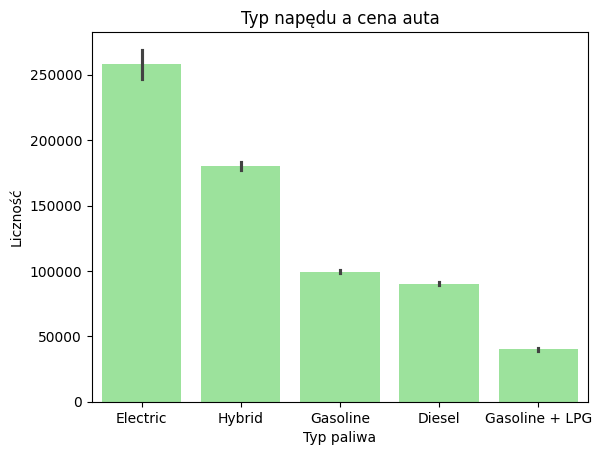

In [125]:
plt.figure()
sns.barplot(
    x=df5['fuel_type'],
    y=df5['price'],
    color='lightgreen',
    order=df5.groupby('fuel_type')['price'].mean().sort_values(ascending=False).index
)
plt.title('Typ napędu a cena auta')
plt.xlabel('Typ paliwa')
plt.ylabel('Liczność')
plt.show()

In [126]:
for col in categorical_columns:
    pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
    print(f"Średnia wartość dla {col}:")
    print(pivot_table)

Średnia wartość dla seller_type:
                     car_age
seller_type                 
Authorized Dealer   2.031141
Dealer              7.268904
Private person     10.692993
Średnia wartość dla fuel_type:
                  car_age
fuel_type                
Diesel           8.616547
Electric         1.628601
Gasoline         7.354427
Gasoline + LPG  10.917546
Hybrid           2.155324
Średnia wartość dla vehicle_model:
                 car_age
vehicle_model           
2               8.784314
2008            4.675757
207            14.561947
208             4.778912
3               9.098765
...                  ...
i20             5.519125
i40             8.930818
ix20            9.927928
ix35           10.375000
up!             6.111111

[248 rows x 1 columns]
Średnia wartość dla vehicle_brand:
                 car_age
vehicle_brand           
Abarth          9.500000
Alfa Romeo      3.316574
Audi            8.495703
BMW             7.688301
Chevrolet      12.447917
Citroën        

<ipython-input-126-89cf14831679>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
<ipython-input-126-89cf14831679>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
<ipython-input-126-89cf14831679>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
<ipython-input-126-89cf14

## Macierze korelacji

Index(['price', 'power', 'car_age', 'mileage', 'transmission_Manual',
       'vat_Tak', 'state_Used', 'engine_displacement',
       'rear_parking_camera_True', 'front_lamps_in_led_technology_True',
       'electrically_adjustable_passenger_seat_True',
       'leather_upholstery_True', 'seller_type_Private person',
       'vehicle_brand_Mercedes-Benz', 'vehicle_brand_Porsche'],
      dtype='object')


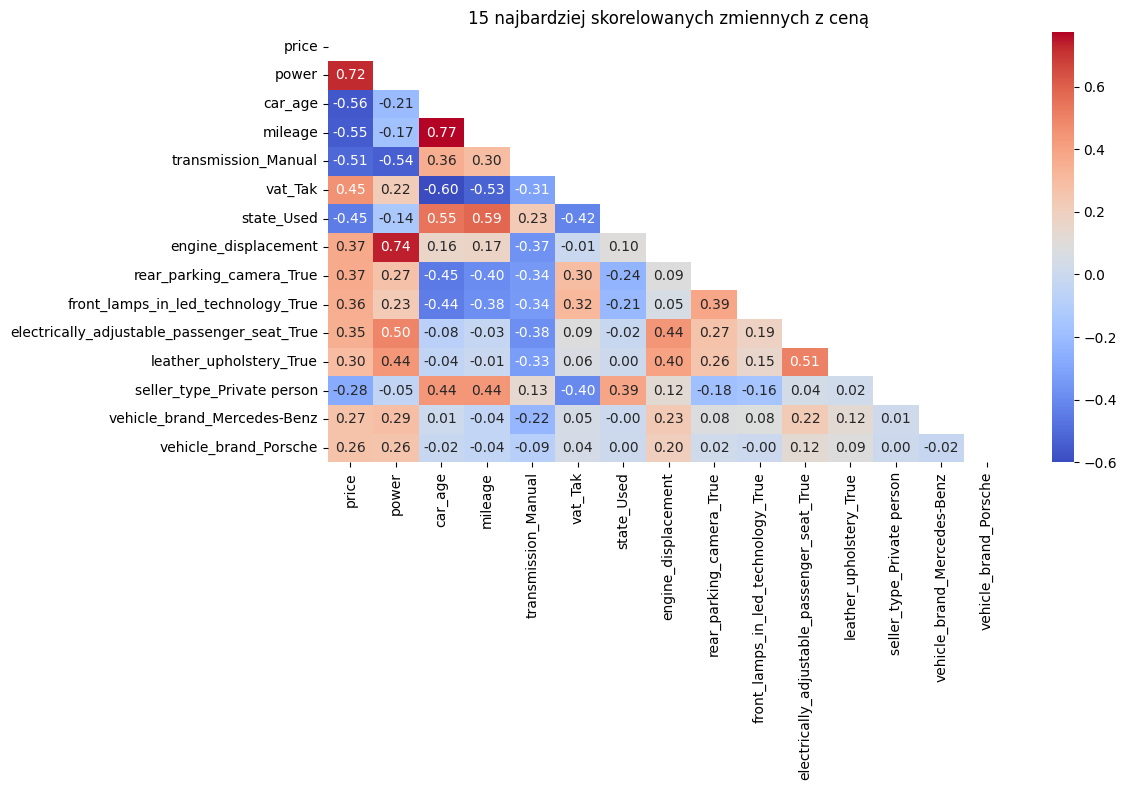

In [127]:
import seaborn as sns


df_encoded = pd.get_dummies(df5.drop(columns=['vehicle_model']), drop_first=True)

correlations = df_encoded.corr()['price'].abs().sort_values(ascending=False)

top_15_features = correlations.index[0:15]


import matplotlib.pyplot as plt

print(top_15_features)


plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_encoded[top_15_features].corr(), dtype=bool))
sns.heatmap(df_encoded[top_15_features].corr(), mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("15 najbardziej skorelowanych zmiennych z ceną")
plt.tight_layout()
plt.show()

### Wykresy po czyszczeniu danych

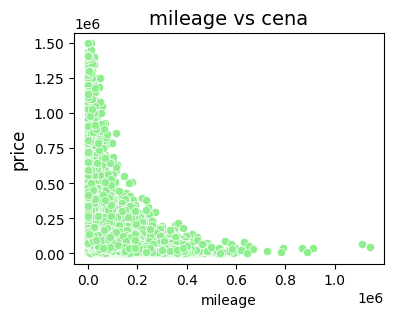

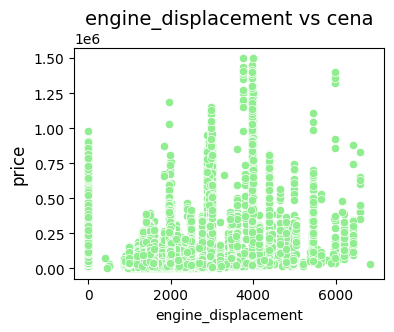

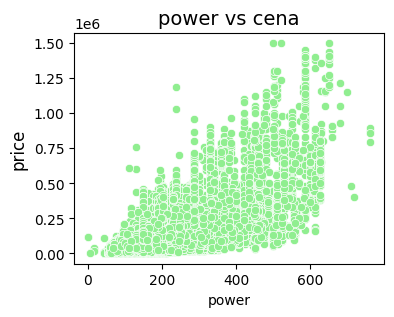

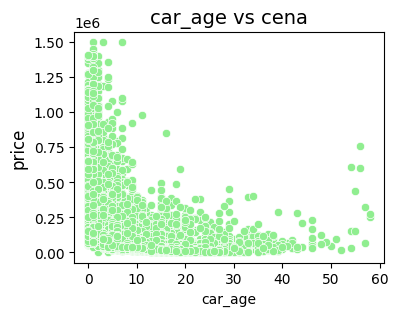

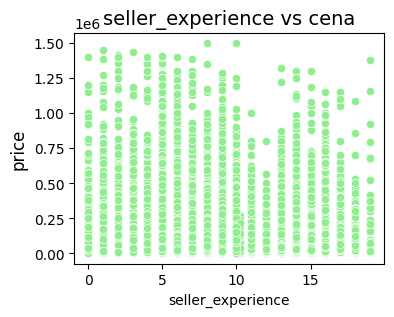

In [128]:
quantitative_vars = ['price', 'mileage', 'engine_displacement', 'power', 'car_age', 'seller_experience']
for var in quantitative_vars[1:]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df5[var], y=df5['price'], color='lightgreen')
    plt.title(f'{var} vs cena', fontsize=14)
    plt.ylabel('price', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

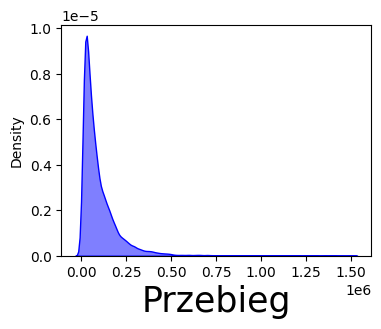

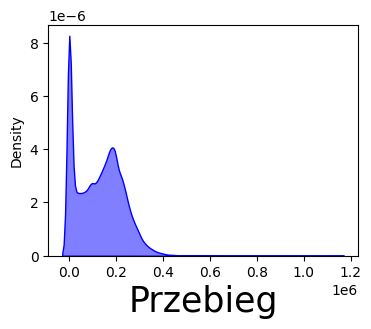

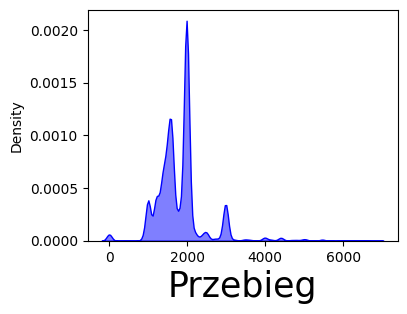

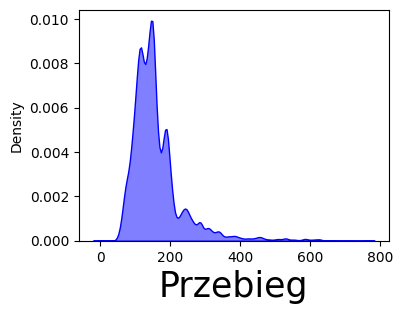

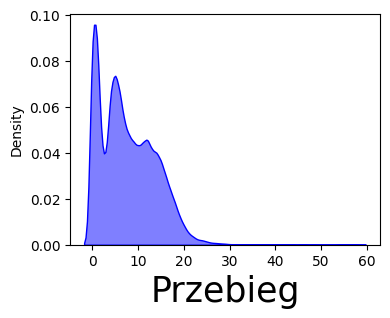

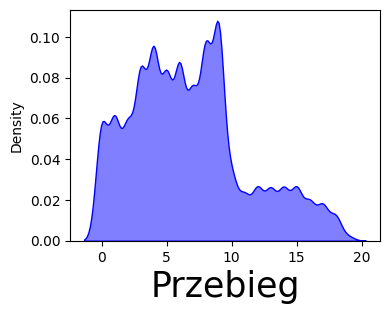

In [129]:
for var in quantitative_vars:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(df5[var], fill=True, color="blue", alpha=0.5)
    plt.xlabel('Przebieg', fontsize=25)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


In [130]:
df5.to_csv('dane_po_transformacji.csv')

In [131]:
df5.describe().round(2)

,price,mileage,engine_displacement,power,car_age,seller_experience
count,99591.00,99591.00,99591.00,99591.00,99591.00,99591.00
mean,98905.93,126940.36,1806.73,158.87,7.72,6.77
std,111747.60,96636.45,642.73,74.85,5.96,4.45
min,1880.00,0.00,0.00,1.00,0.00,0.00
25%,31900.00,33347.00,1482.00,115.00,3.00,3.00
50%,63500.00,130260.00,1796.00,142.00,7.00,6.00
75%,126715.00,198600.00,1995.00,182.00,12.00,9.00
max,1500000.00,1142257.00,6834.00,761.00,58.00,19.00


In [132]:
categorical_columns = [
    'seller_type', 'body_type',
    'number_of_doors'
]

for col in categorical_columns:
    pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
    print(f"Średnia cena dla {col}:")
    print(pivot_table)

Średnia cena dla seller_type:
                           price
seller_type                     
Authorized Dealer  178498.203125
Dealer              97820.757812
Private person      63490.757812
Średnia cena dla body_type:
                       price
body_type                   
Cabriolet      212150.671875
City cars       42216.820312
Compact         60548.203125
Coupe          208185.875000
Minivan         66068.742188
SUV            138195.421875
Sedan          130205.507812
Small cars      40663.394531
Station wagon   70018.250000
Średnia cena dla number_of_doors:
                         price
number_of_doors               
2.0              237633.578125
3.0               37294.515625
4.0              143355.937500
5.0               93390.414062
6.0               44598.078125


<ipython-input-132-7461d9ce5bc1>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
<ipython-input-132-7461d9ce5bc1>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
<ipython-input-132-7461d9ce5bc1>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')


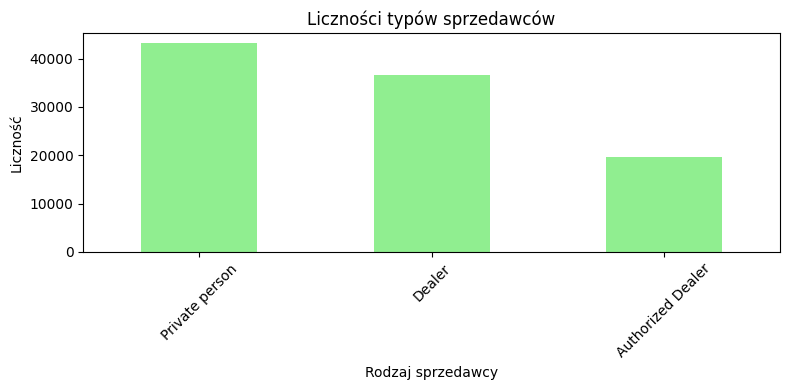

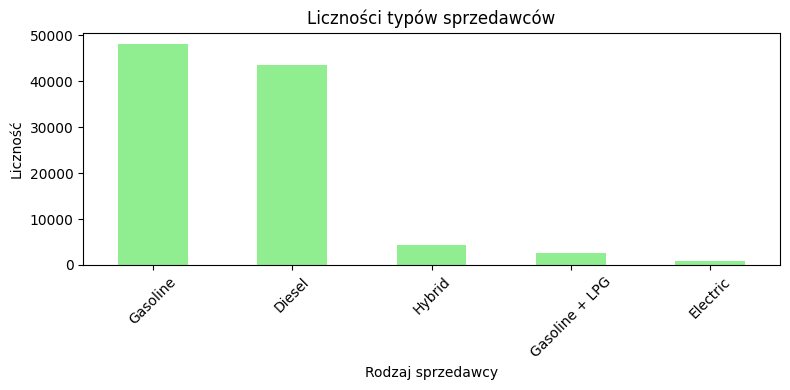

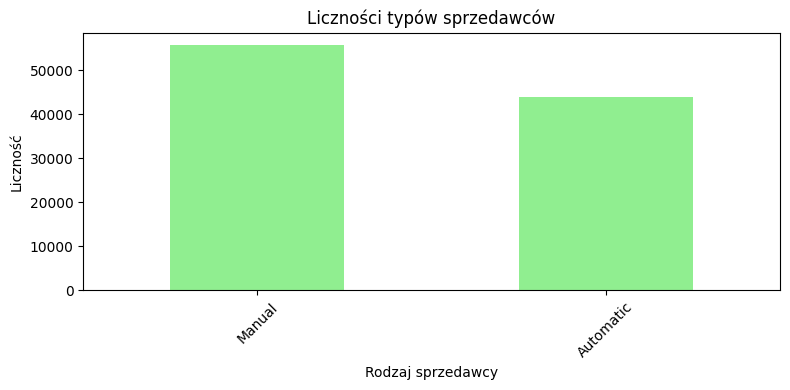

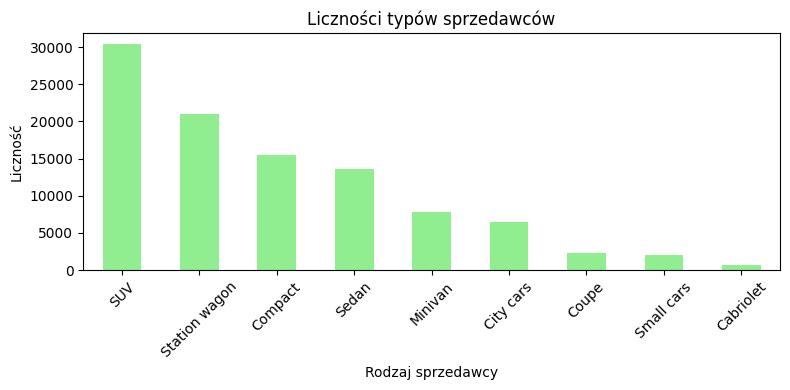

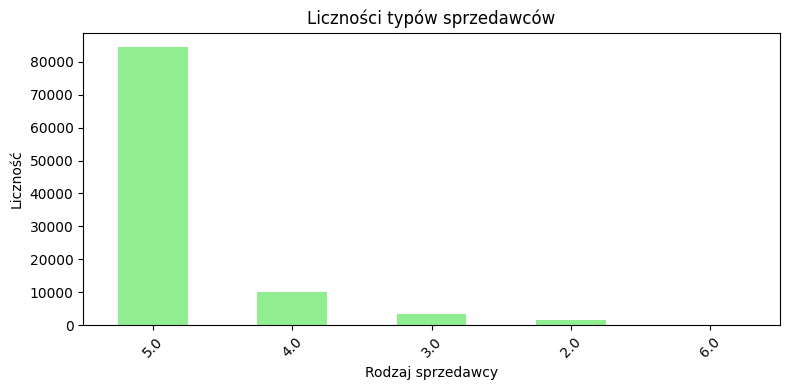

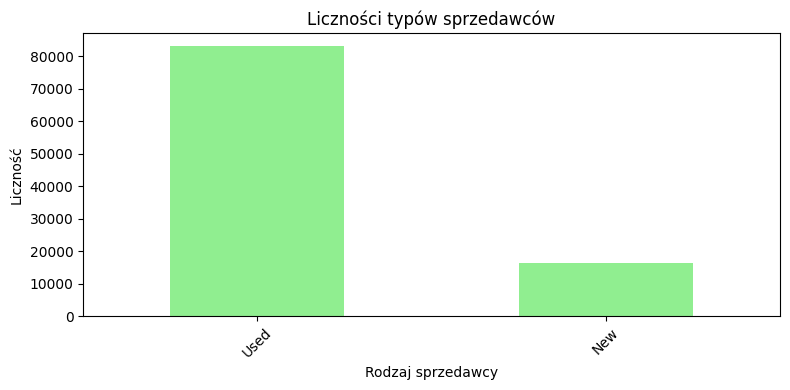

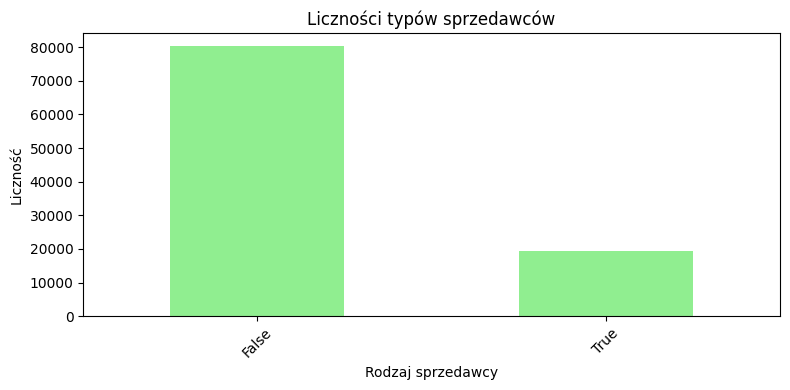

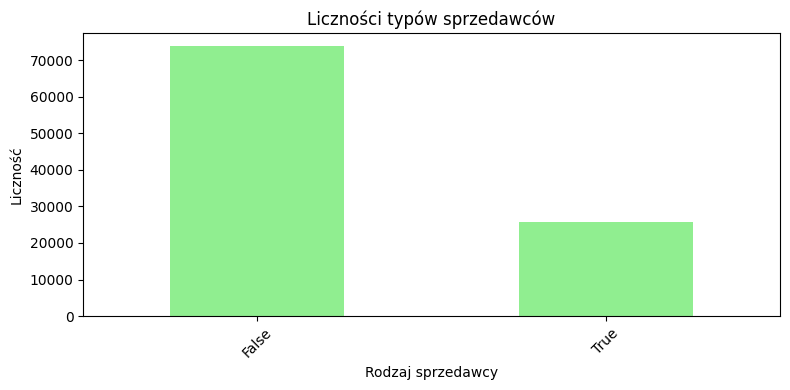

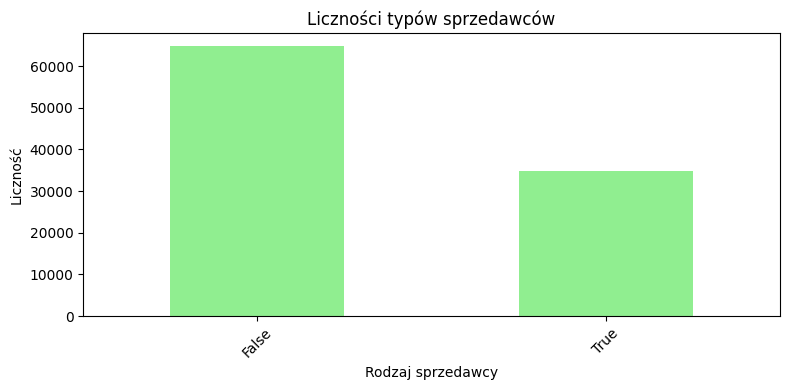

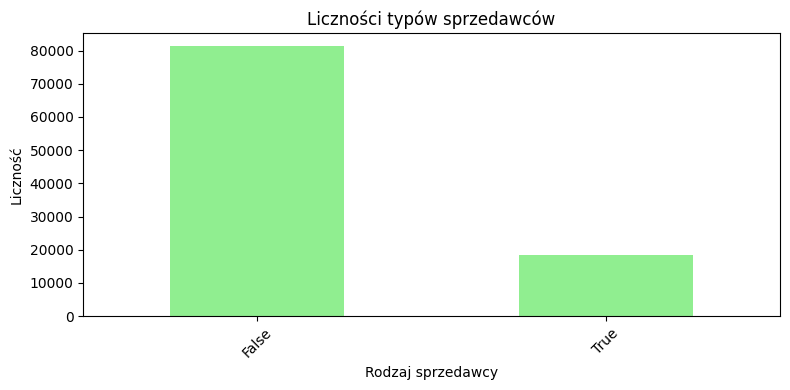

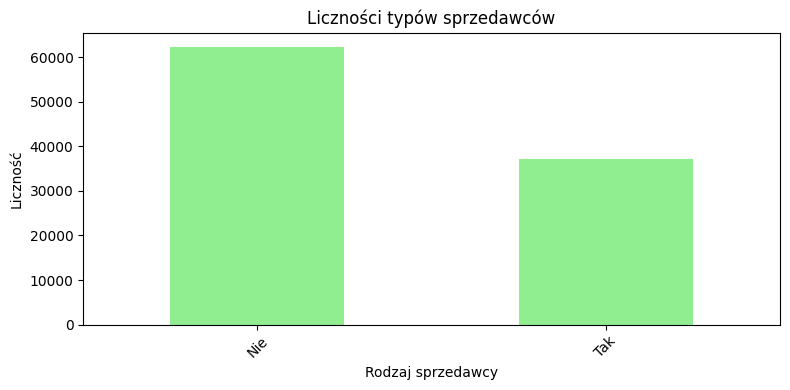

In [133]:
categorical_columns = [
    'seller_type', 'fuel_type', 'transmission', 'body_type',
    'number_of_doors', 'state', 'leather_upholstery', 'front_lamps_in_led_technology',
    'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df5[col].value_counts().plot(kind='bar', color='#90ee90')  # jasnozielony (light green)
    plt.title(f'Liczności typów sprzedawców')
    plt.xlabel('Rodzaj sprzedawcy')
    plt.ylabel('Liczność')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [134]:
df5['car_age'].describe()

,car_age
count,99591.000000
mean,7.716802
std,5.957561
min,0.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,58.000000


# Skalowanie cech numerycznych

In [135]:
df5=df5.drop('vehicle_brand',axis=1)
df4_log=df5.copy()
df4_log['price']=np.log(df4_log['price'])

df4_sqrt=df5.copy()
df4_sqrt['price']=np.sqrt(df4_sqrt['price'])

Z racji, że nasze zmienne są w różnej skali to przeskaluje je poprzez standard scaler (x-u)/s

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
numeric_features = ['power', 'mileage', 'car_age','engine_displacement','seller_experience']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['seller_type', 'fuel_type','vehicle_model', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


y = df5['price']
X = df5.drop('price', axis=1)
X_preprocessed = preprocessor.fit_transform(X)
y_log = df4_log['price']
X_log = df4_log.drop('price', axis=1)
X_log_preprocessed = preprocessor.fit_transform(X_log)

y_sqrt = df4_sqrt['price']
X_sqrt = df4_sqrt.drop('price', axis=1)
X_sqrt_preprocessed = preprocessor.fit_transform(X_sqrt)


**Podział na testowy i uczący zbiór**

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2,
                                                    random_state=0,shuffle=True)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_preprocessed, y_log, test_size=0.2,
                                                    random_state=0,shuffle=True)

X_sqrt_train, X_sqrt_test, y_sqrt_train, y_sqrt_test = train_test_split(X_sqrt_preprocessed, y_sqrt, test_size=0.2,
                                                    random_state=0,shuffle=True)

# Regresja liniowa

In [141]:
from sklearn.linear_model import LinearRegression
regresja = LinearRegression()
regresja.fit(X_train, y_train)

y_pred_Reg=regresja.predict(X_test)
MAPE_Reg=mean_absolute_percentage_error(y_pred_Reg,y_test)
MAE_Reg=mean_absolute_error(y_pred_Reg,y_test)


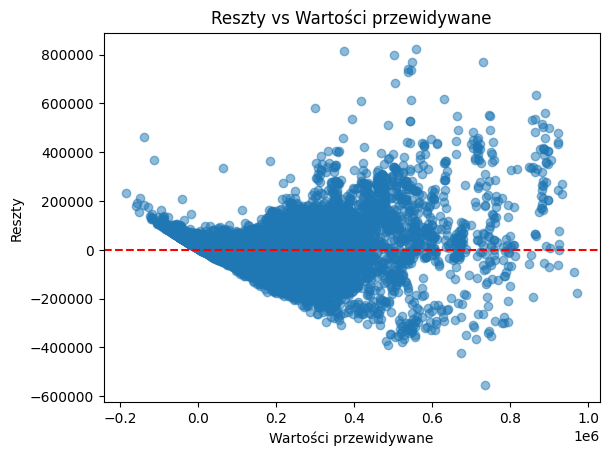

Bartlett's test: stat=53219.7100, p-value=0
Levene's test: stat=23547.0807, p-value=0


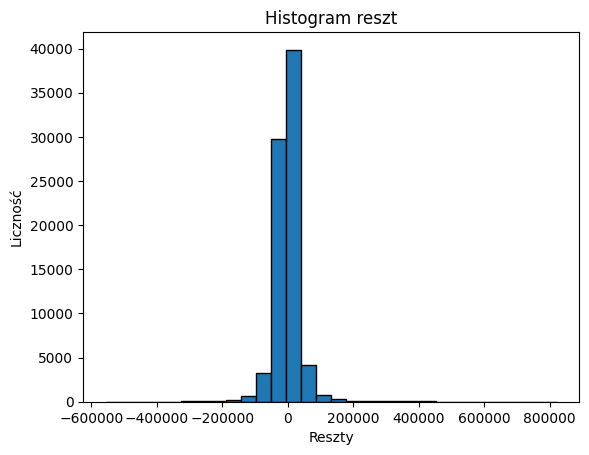

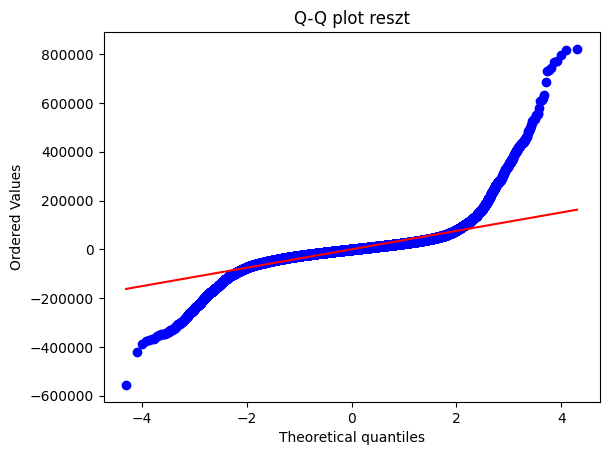

Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.7662, p-value=3.269e-131


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


In [142]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

import scipy.stats as stats

# 1. Oblicz reszty
y_train_pred = regresja.predict(X_train)
residuals = y_train - y_train_pred

# 2. Wykres reszt względem wartości przewidywanych (homoscedastyczność)
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.title('Reszty vs Wartości przewidywane')
plt.show()

# Test Bartletta (homoscedastyczność, normalność wymagane)
bartlett_stat, bartlett_p = stats.bartlett(y_train_pred, residuals)
print(f"Bartlett's test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

# Test Levene'a (homoscedastyczność, nie wymaga normalności)
levene_stat, levene_p = stats.levene(y_train_pred, residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")



# 3. Histogram reszt (normalność rozkładu reszt)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Liczność')
plt.show()

# 4. Q-Q plot (normalność rozkładu reszt)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot reszt')
plt.show()

# 5. Sprawdzenie autokorelacji reszt (test Durbin-Watsona)
dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')

# 6. Test Shapiro-Wilka dla normalności reszt
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')




#### Logarytm regresja

In [143]:
regresja.fit(X_log_train, y_log_train)
y_pred_Reg_log=regresja.predict(X_log_test)
MAPE_Reg_log=mean_absolute_percentage_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))
MAE_Reg_log=mean_absolute_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))

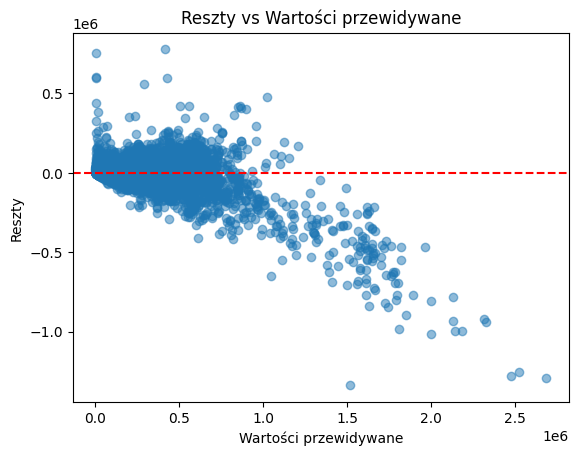

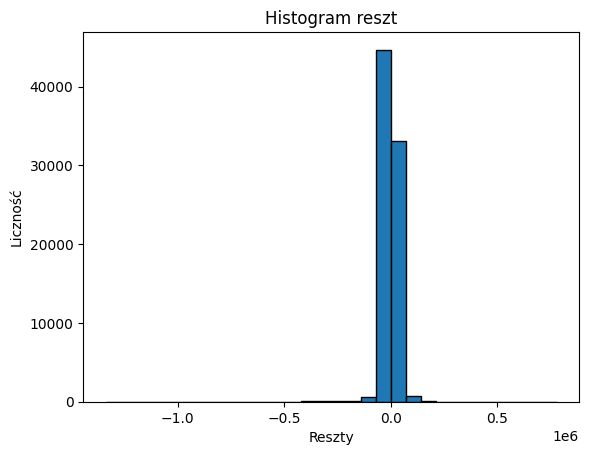

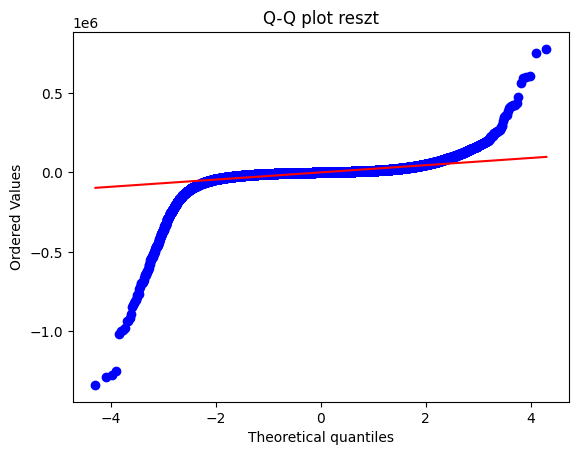

Bartlett's test: stat=79544.0251, p-value=0
Levene's test: stat=39068.2608, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.4288, p-value=5.385e-159


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


In [144]:
y_log_train_pred = regresja.predict(X_log_train)
residuals = np.exp(y_log_train) - np.exp(y_log_train_pred)

# 2. Wykres reszt względem wartości przewidywanych (homoscedastyczność)
plt.scatter(np.exp(y_log_train_pred), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.title('Reszty vs Wartości przewidywane')
plt.show()

# 3. Histogram reszt (normalność rozkładu reszt)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Liczność')
plt.show()

# 4. Q-Q plot (normalność rozkładu reszt)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot reszt')
plt.show()

# Test Bartletta (homoscedastyczność, normalność wymagane)
bartlett_stat, bartlett_p = stats.bartlett(y_train_pred, residuals)
print(f"Bartlett's test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

# Test Levene'a (homoscedastyczność, nie wymaga normalności)
levene_stat, levene_p = stats.levene(y_train_pred, residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")

# 5. Sprawdzenie autokorelacji reszt (test Durbin-Watsona)
dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')

# 6. Test Shapiro-Wilka dla normalności reszt
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')

Pierwiastek regresja

In [145]:
regresja.fit(X_sqrt_train, y_sqrt_train)
y_pred_Reg_sqrt=regresja.predict(X_sqrt_test)
MAPE_Reg_sqrt=mean_absolute_percentage_error(np.square(y_pred_Reg_sqrt),np.square(y_sqrt_test))
MAE_Reg_sqrt=mean_absolute_error(np.square(y_pred_Reg_sqrt),np.square(y_sqrt_test))

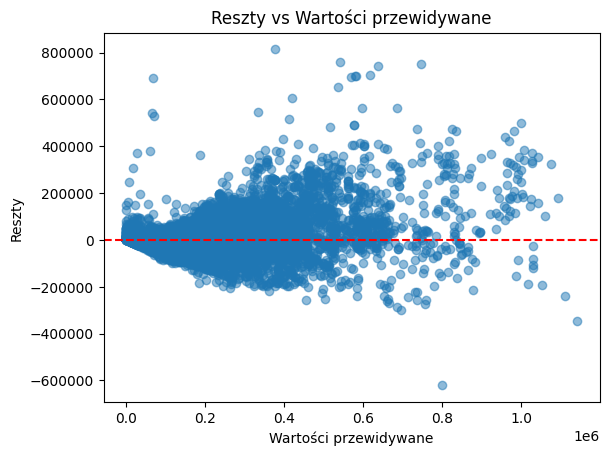

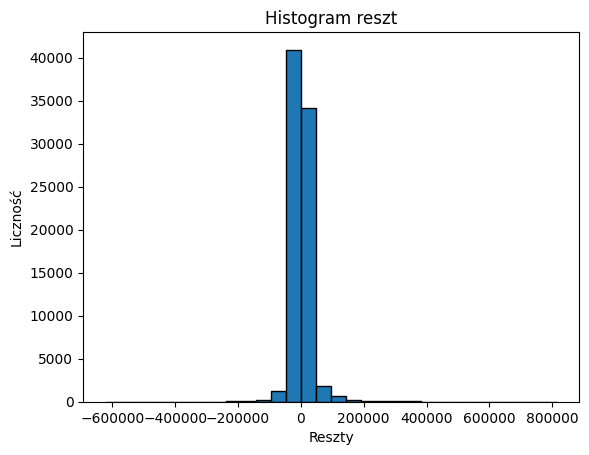

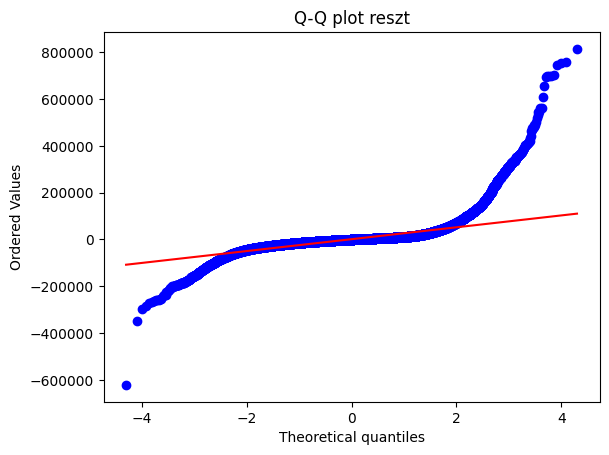

Bartlett's test: stat=2155575.0589, p-value=0
Levene's test: stat=12230.8600, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.6036, p-value=2.644e-147


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


In [146]:
y_sqrt_train_pred = regresja.predict(X_sqrt_train)
residuals = y_sqrt_train**2 - y_sqrt_train_pred**2

# 2. Wykres reszt względem wartości przewidywanych (homoscedastyczność)
plt.scatter(y_sqrt_train_pred**2, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.title('Reszty vs Wartości przewidywane')
plt.show()

# 3. Histogram reszt (normalność rozkładu reszt)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Liczność')
plt.show()

# 4. Q-Q plot (normalność rozkładu reszt)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot reszt')
plt.show()

# Test Bartletta (homoscedastyczność, normalność wymagane)
bartlett_stat, bartlett_p = stats.bartlett(y_train_pred**2, residuals)
print(f"Bartlett's test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

# Test Levene'a (homoscedastyczność, nie wymaga normalności)
levene_stat, levene_p = stats.levene(y_train_pred**2, residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")

# 5. Sprawdzenie autokorelacji reszt (test Durbin-Watsona)
dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')

# 6. Test Shapiro-Wilka dla normalności reszt
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')



# Ridge

In [147]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1,random_state=50)
ridge.fit(X_train, y_train)
y_pred_Ridge=ridge.predict(X_test)
MAPE_Ridge=mean_absolute_percentage_error(y_pred_Ridge,y_test)
MAE_Ridge=mean_absolute_error(y_pred_Ridge,y_test)

## Ridge logarytm

In [148]:
ridge=Ridge(alpha=1,random_state=50)
ridge.fit(X_log_train, y_log_train)
y_pred_Ridge_log=ridge.predict(X_log_test)
MAPE_Ridge_log=mean_absolute_percentage_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))
MAE_Ridge_log=mean_absolute_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))

Pierwiastek Ridge

In [149]:
ridge = Ridge(alpha=0.001,random_state=50)
ridge.fit(X_sqrt_train, y_sqrt_train)
y_pred_Ridge_sqrt = ridge.predict(X_sqrt_test)
MAPE_Ridge_sqrt = mean_absolute_percentage_error(np.square(y_pred_Ridge_sqrt), np.square(y_sqrt_test))
MAE_Ridge_sqrt = mean_absolute_error(np.square(y_pred_Ridge_sqrt), np.square(y_sqrt_test))

# Lasy losowe

In [150]:
from sklearn.ensemble import RandomForestRegressor


Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_train, y_train)
y_pred_Las=Forest.predict(X_test)
MAE_las=mean_absolute_error(y_test,y_pred_Las)
MAPE_las=mean_absolute_percentage_error(y_test,y_pred_Las)


## Z logarytmem

In [151]:

Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_log_train, y_log_train)
y_pred_Las_log=Forest.predict(X_log_test)
MAPE_las_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_Las_log))
MAE_las_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_Las_log))

### Z pierwiastkiem

In [152]:
Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_sqrt_train, y_sqrt_train)
y_pred_Las_sqrt = Forest.predict(X_sqrt_test)
MAPE_las_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_Las_sqrt))
MAE_las_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_Las_sqrt))

# MLP

In [153]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
Network=MLPRegressor(hidden_layer_sizes=(500, 300, 150),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_train, y_train)
y_pred_MLP=Network.predict(X_test)
MAE_MLP=mean_absolute_error(y_test,y_pred_MLP)
MAPE_MLP=mean_absolute_percentage_error(y_test,y_pred_MLP)


### z logarytmem

In [154]:

Network=MLPRegressor(hidden_layer_sizes=(300),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_log_train, y_log_train)
y_pred_MLP_log=Network.predict(X_log_test)
MAE_MLP_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))
MAPE_MLP_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))

## Z pierwiastkiem

In [155]:

Network = MLPRegressor(hidden_layer_sizes=(500),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_sqrt_train, y_sqrt_train)
y_pred_MLP_sqrt = Network.predict(X_sqrt_test)
MAE_MLP_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_MLP_sqrt))
MAPE_MLP_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_MLP_sqrt))

# XGBOOST

In [156]:
import xgboost as xgb

xgb_model=xgb.XGBRegressor(objective='reg:linear',n_estimators=1000,learning_rate=0.1,max_depth=12,random_state=50)
xgb_model.fit(X_train, y_train)
y_pred_XGB=xgb_model.predict(X_test)
MAE_XGB=mean_absolute_error(y_test,y_pred_XGB)
MAPE_XGB=mean_absolute_percentage_error(y_test,y_pred_XGB)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


### Z logarytmem

In [157]:

xgb_model=xgb.XGBRegressor(objective='reg:linear',n_estimators=1000,learning_rate=0.1,max_depth=10,random_state=50)
xgb_model.fit(X_log_train, y_log_train)
y_pred_XGB_log=xgb_model.predict(X_log_test)
MAPE_XGB_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))
MAE_XGB_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))

## Z pierwiastkiem

In [158]:

xgb_model = xgb.XGBRegressor(objective='reg:linear', n_estimators=1000, learning_rate=0.1, max_depth=10,random_state=50)
xgb_model.fit(X_sqrt_train, y_sqrt_train)
y_pred_XGB_sqrt = xgb_model.predict(X_sqrt_test)
MAPE_XGB_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_XGB_sqrt))
MAE_XGB_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_XGB_sqrt))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Tabela wyników

In [159]:
comparison_table = pd.DataFrame({
    'Actual': np.exp(y_log_test),
    'MLPLog': np.exp(y_pred_MLP_log),
    'MLP': y_pred_MLP,
    'LogLinear': np.exp(y_pred_Reg_log),
    'RidgeLog': np.exp(y_pred_Ridge_log),
    'laslosLog': np.exp(y_pred_Las_log),
    'xgboostLog': np.exp(y_pred_XGB_log),
    'Linear': y_pred_Reg,
    'Ridge': y_pred_Ridge,
    'laslos': y_pred_Las,
    'xgboost': y_pred_XGB,
    'MLPSqrt': np.square(y_pred_MLP_sqrt),
    'LinearSqrt': np.square(y_pred_Reg_sqrt),
    'RidgeSqrt': np.square(y_pred_Ridge_sqrt),
    'laslosSqrt': np.square(y_pred_Las_sqrt),
    'xgboostSqrt': np.square(y_pred_XGB_sqrt),
})


comparison_table.tail(20)

,Actual,MLPLog,MLP,LogLinear,RidgeLog,laslosLog,xgboostLog,Linear,Ridge,laslos,xgboost,MLPSqrt,LinearSqrt,RidgeSqrt,laslosSqrt,xgboostSqrt
60951,146000.031250,152970.251689,150897.777619,162439.386158,162893.670290,144302.546266,150636.734375,155420.613738,155601.130825,144473.052857,150101.078125,150787.929993,160243.573484,160267.474671,144406.553577,150372.000000
40483,37900.007812,39247.446479,37287.797729,41436.552645,41568.834222,34053.172386,34856.601562,64724.885271,64732.115556,35613.870000,36171.324219,39998.545729,52158.092121,52167.634390,34391.830065,35086.574219
68422,46899.980469,38482.581634,43336.728936,41277.445003,41108.015794,45902.397866,45215.894531,37456.830602,37401.004925,46193.690000,46499.617188,42792.052605,41504.501217,41543.038832,46429.410591,46026.386719
184346,64500.027344,58791.548267,59346.023982,50386.356468,50444.568006,67452.879475,66027.023438,62679.951176,62917.735756,69050.966667,67648.593750,61504.596202,57566.309641,57621.933473,67975.681275,64772.578125
24519,214900.046875,200660.324732,208804.207711,214162.184988,214036.724136,211858.196879,213503.421875,183435.056537,183422.738145,214226.593333,214540.359375,205697.971550,189954.818070,190032.900471,216575.944351,205082.796875
5586,113989.953125,115331.255702,116224.240974,107277.336269,107078.978912,107510.970295,113392.648438,129348.022942,129273.425935,107072.916667,115085.859375,121934.312446,119152.388947,119086.296893,106263.601823,107571.125000
43198,18900.000000,17984.586480,18683.312999,19016.424284,18969.798312,16480.632833,18962.755859,-12194.352069,-12118.948733,16590.320000,18628.171875,18409.420229,13469.934995,13488.596183,16353.915230,19762.642578
96098,91018.015625,86813.237450,93555.635564,80152.742522,79974.622885,82558.870279,86252.234375,102776.453872,102866.513257,86252.960000,87067.320312,100508.349165,91299.088169,91354.896309,84554.478546,79696.039062
158628,52900.003906,53427.274336,56171.723133,55908.108368,55807.850911,51530.725938,57710.691406,58613.954116,58658.799950,54310.133333,58080.050781,61914.050737,58973.002270,59027.397784,53942.829364,57505.585938
158924,99000.015625,81520.064720,79009.064217,77689.561368,77207.800378,77511.388595,82181.515625,142089.751675,141897.073103,79526.781667,80462.125000,77819.498100,105479.107469,105401.074934,78782.833638,81280.304688


In [184]:
errors_table = pd.DataFrame({
    'MLPLog': {'MAPE': MAPE_MLP_log, 'MAE': MAE_MLP_log},
    'MLP': {'MAPE': MAPE_MLP, 'MAE': MAE_MLP},
    'MLPSqrt': {'MAPE': MAPE_MLP_sqrt, 'MAE': MAE_MLP_sqrt},
    'LogLinear': {'MAPE': MAPE_Reg_log, 'MAE': MAE_Reg_log},
    'Linear': {'MAPE': MAPE_Reg, 'MAE': MAE_Reg},
    'LinearSqrt': {'MAPE': MAPE_Reg_sqrt, 'MAE': MAE_Reg_sqrt},
    'RidgeLog': {'MAPE': MAPE_Ridge_log, 'MAE': MAE_Ridge_log},
    'Ridge': {'MAPE': MAPE_Ridge, 'MAE': MAE_Ridge},
    'RidgeSqrt': {'MAPE': MAPE_Ridge_sqrt, 'MAE': MAE_Ridge_sqrt},
    'laslosLog': {'MAPE': MAPE_las_log, 'MAE': MAE_las_log},
    'laslos': {'MAPE': MAPE_las, 'MAE': MAE_las},
    'laslosSqrt': {'MAPE': MAPE_las_sqrt, 'MAE': MAE_las_sqrt},
    'xgboostLog': {'MAPE': MAPE_XGB_log, 'MAE': MAE_XGB_log},
    'xgboost': {'MAPE': MAPE_XGB, 'MAE': MAE_XGB},
    'xgboostSqrt': {'MAPE': MAPE_XGB_sqrt, 'MAE': MAE_XGB_sqrt}
})

errors_table.to_csv('errors_table.csv')
errors_table

,MLPLog,MLP,MLPSqrt,LogLinear,Linear,LinearSqrt,RidgeLog,Ridge,RidgeSqrt,laslosLog,laslos,laslosSqrt,xgboostLog,xgboost,xgboostSqrt
MAPE,0.107204,0.105164,0.102277,0.156961,1.805202,2.744044,0.157192,3.052490,2.767581,0.114423,0.122265,0.116835,0.099327,0.101921,0.100186
MAE,9282.388527,8384.570532,8353.539321,12984.364364,25436.292412,15344.922664,12965.810923,25441.211813,15344.473613,9808.866658,9514.655261,9560.761800,8357.212891,8372.809570,8325.394531


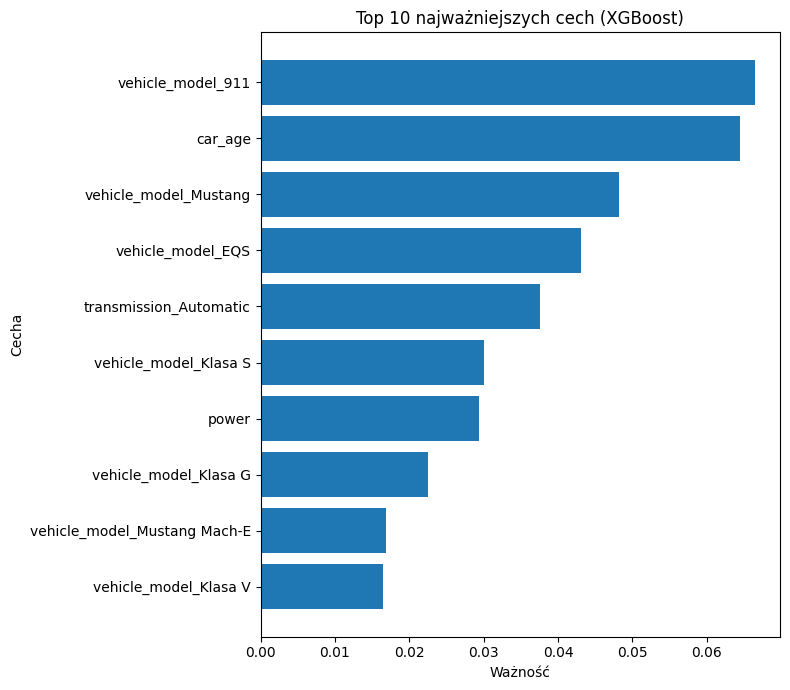

In [194]:

importances = xgb_model.feature_importances_

feature_names = []
feature_names.extend(numeric_features)
feature_names.extend(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = np.array(feature_names)[indices]

plt.figure(figsize=(8, 7))
plt.barh(range(10), sorted_importances[:10][::-1])
plt.yticks(range(10), sorted_feature_names[:10][::-1])
plt.title('Top 10 najważniejszych cech (XGBoost)')
plt.ylabel('Cecha')
plt.xlabel('Ważność')
plt.tight_layout()
plt.show()